In [6]:
# Importing necessary libraries
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Assuming you have a DataFrame named 'rose_data'
# Read Rose.csv dataset
rose_data = pd.read_csv('Rose.csv')

# Converting 'YearMonth' to datetime64
rose_data['YearMonth'] = pd.to_datetime(rose_data['YearMonth'], format='%Y-%m')

# Printing the head to verify the changes
print(rose_data.head())


   YearMonth   Rose
0 1980-01-01  112.0
1 1980-02-01  118.0
2 1980-03-01  129.0
3 1980-04-01   99.0
4 1980-05-01  116.0


In [3]:
rose_data.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

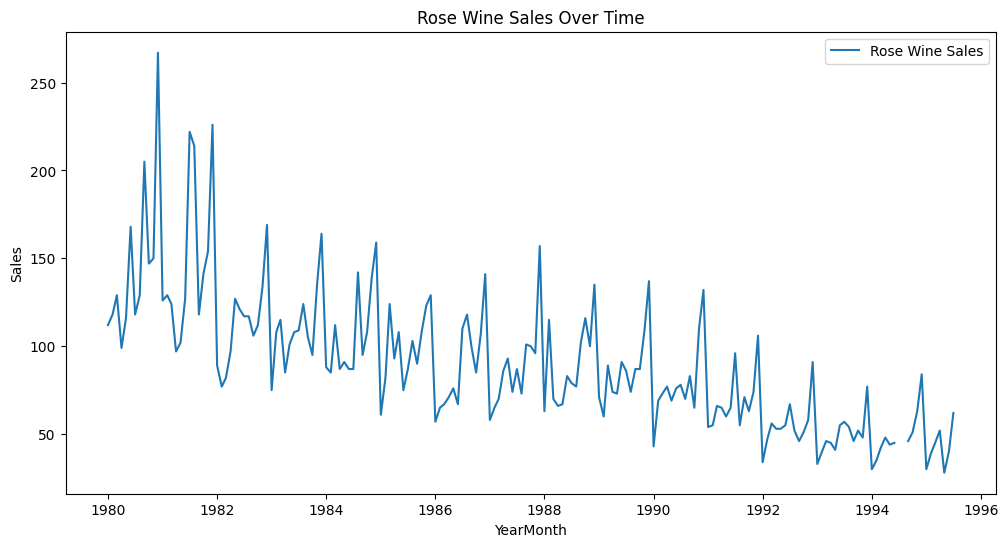

In [4]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(rose_data['YearMonth'], rose_data['Rose'], label='Rose Wine Sales')
plt.title('Rose Wine Sales Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [8]:
# Checking for missing values
print("Missing values before imputation:")
print(rose_data.isnull().sum())

Missing values before imputation:
YearMonth    0
Rose         2
dtype: int64


In [9]:
# Applying moving average imputation
window_size = 3  
rose_data['Rose_filled'] = rose_data['Rose'].rolling(window=window_size, min_periods=1).mean()

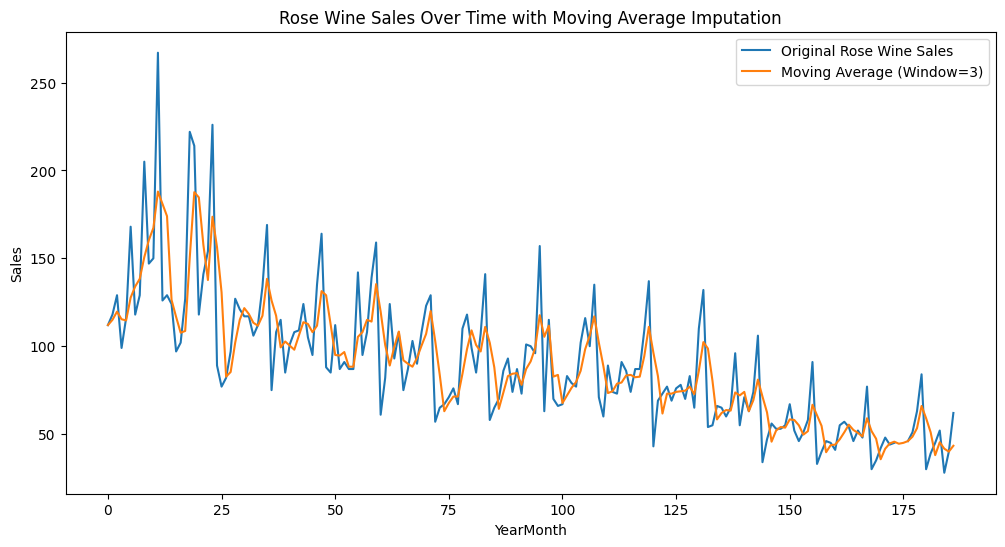

In [10]:
# Plotting the original and imputed time series
plt.figure(figsize=(12, 6))
plt.plot(rose_data.index, rose_data['Rose'], label='Original Rose Wine Sales')
plt.plot(rose_data.index, rose_data['Rose_filled'], label=f'Moving Average (Window={window_size})')
plt.title('Rose Wine Sales Over Time with Moving Average Imputation')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [11]:
# Checking for missing values after imputation
print("\nMissing values after imputation:")
print(rose_data.isnull().sum())


Missing values after imputation:
YearMonth      0
Rose           2
Rose_filled    0
dtype: int64


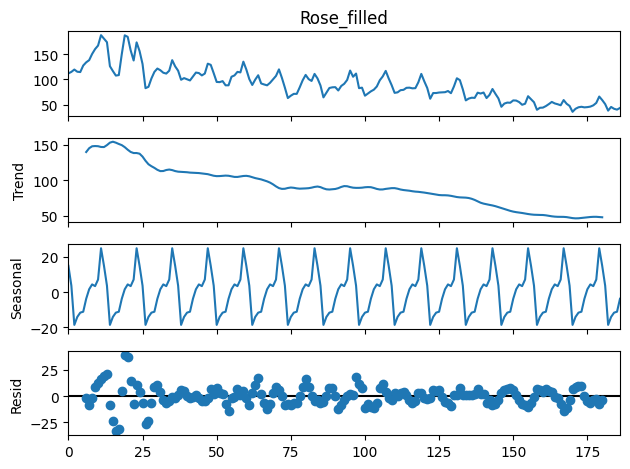

In [13]:
# Performing seasonal decomposition on the imputed data
decomposition_rose_imputed = seasonal_decompose(rose_data['Rose_filled'], model='additive', period=12)
decomposition_rose_imputed.plot()
#plt.suptitle('Additive Decomposition of Rose Wine Sales (Imputed)')
plt.show()

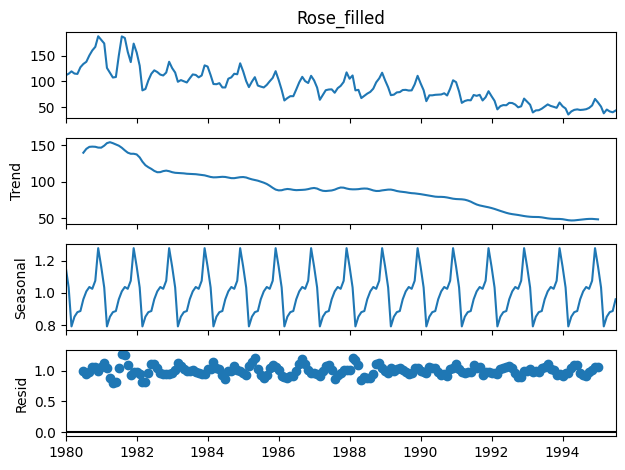

In [54]:
# Performing multiplicative seasonal decomposition on the imputed data
decomposition_rose_imputed_mul = seasonal_decompose(rose_data['Rose_filled'], model='multiplicative', period=12)
decomposition_rose_imputed_mul.plot()
plt.show()

In [17]:
# Assuming you have a DataFrame named 'rose_data' with 'YearMonth' as datetime64
# Reading Rose.csv dataset
rose_data = pd.read_csv('Rose.csv')
rose_data['YearMonth'] = pd.to_datetime(rose_data['YearMonth'], format='%Y-%m')
rose_data = rose_data.set_index('YearMonth')

# Imputing missing values (assuming 'Rose_filled' is the imputed column)
window_size = 3
rose_data['Rose_filled'] = rose_data['Rose'].rolling(window=window_size, min_periods=1).mean()

# Splitting the imputed data into training and test sets

train_data_imputed = rose_data[rose_data.index < '1991-01-01']
test_data_imputed = rose_data[rose_data.index >= '1991-01-01']

# Checking the shapes of the training and test sets
print("Training Data (Imputed) Shape:", train_data_imputed.shape)
print("Test Data (Imputed) Shape:", test_data_imputed.shape)


Training Data (Imputed) Shape: (132, 2)
Test Data (Imputed) Shape: (55, 2)


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


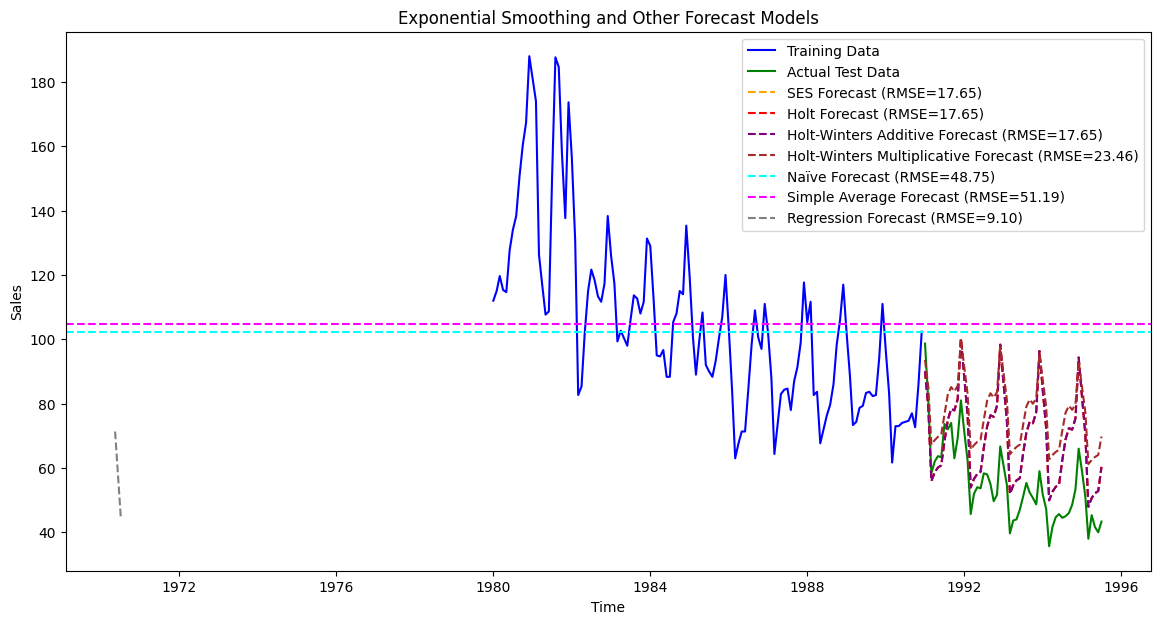

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# 

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# Exponential Smoothing Models
def fit_exponential_smoothing(train_data, test_data, smoothing_type='additive'):
    if smoothing_type == 'additive':
        model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
    elif smoothing_type == 'multiplicative':
        model = ExponentialSmoothing(train_data, trend='add', seasonal='mul', seasonal_periods=12)
    else:
        model = SimpleExpSmoothing(train_data)

    fitted_model = model.fit(optimized=True)
    forecast = fitted_model.forecast(len(test_data))
    rmse = calculate_rmse(test_data, forecast)
    
    return fitted_model, forecast, rmse

# Simple Exponential Smoothing (SES)
ses_model, ses_forecast, ses_rmse = fit_exponential_smoothing(train_data_imputed['Rose_filled'], test_data_imputed['Rose_filled'])

# Holt's Exponential Smoothing
holt_model, holt_forecast, holt_rmse = fit_exponential_smoothing(train_data_imputed['Rose_filled'], test_data_imputed['Rose_filled'], smoothing_type='additive')

# Holt-Winters Exponential Smoothing (Additive)
hw_add_model, hw_add_forecast, hw_add_rmse = fit_exponential_smoothing(train_data_imputed['Rose_filled'], test_data_imputed['Rose_filled'], smoothing_type='additive')

# Holt-Winters Exponential Smoothing (Multiplicative)
hw_mul_model, hw_mul_forecast, hw_mul_rmse = fit_exponential_smoothing(train_data_imputed['Rose_filled'], test_data_imputed['Rose_filled'], smoothing_type='multiplicative')

# Naïve Forecast Model
naive_forecast = train_data_imputed['Rose_filled'].iloc[-1]
naive_rmse = calculate_rmse(test_data_imputed['Rose_filled'], [naive_forecast] * len(test_data_imputed))

# Simple Average Model
average_forecast = train_data_imputed['Rose_filled'].mean()
average_rmse = calculate_rmse(test_data_imputed['Rose_filled'], [average_forecast] * len(test_data_imputed))

# Regression Model (you may need to adjust this based on your dataset)
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(np.array(range(len(train_data_imputed))).reshape(-1, 1), train_data_imputed['Rose_filled'])
regression_forecast = regression_model.predict(np.array(range(len(train_data_imputed), len(train_data_imputed) + len(test_data_imputed))).reshape(-1, 1))
regression_rmse = calculate_rmse(test_data_imputed['Rose_filled'], regression_forecast)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(train_data_imputed['Rose_filled'], label='Training Data', color='blue')
plt.plot(test_data_imputed['Rose_filled'], label='Actual Test Data', color='green')
plt.plot(ses_forecast, label=f'SES Forecast (RMSE={ses_rmse:.2f})', linestyle='dashed', color='orange')
plt.plot(holt_forecast, label=f'Holt Forecast (RMSE={holt_rmse:.2f})', linestyle='dashed', color='red')
plt.plot(hw_add_forecast, label=f'Holt-Winters Additive Forecast (RMSE={hw_add_rmse:.2f})', linestyle='dashed', color='purple')
plt.plot(hw_mul_forecast, label=f'Holt-Winters Multiplicative Forecast (RMSE={hw_mul_rmse:.2f})', linestyle='dashed', color='brown')
plt.axhline(naive_forecast, label=f'Naïve Forecast (RMSE={naive_rmse:.2f})', linestyle='dashed', color='cyan')
plt.axhline(average_forecast, label=f'Simple Average Forecast (RMSE={average_rmse:.2f})', linestyle='dashed', color='magenta')
plt.plot(np.arange(len(train_data_imputed), len(train_data_imputed) + len(test_data_imputed)), regression_forecast, label=f'Regression Forecast (RMSE={regression_rmse:.2f})', linestyle='dashed', color='gray')
plt.title('Exponential Smoothing and Other Forecast Models')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

# Fitting SES model
ses_model = SimpleExpSmoothing(train_data_imputed['Rose_filled']).fit()

# Forecasting on test data
ses_forecast = ses_model.forecast(len(test_data_imputed))

# Calculating RMSE
ses_rmse = mean_squared_error(test_data_imputed['Rose_filled'], ses_forecast, squared=False)
print("SES RMSE:", ses_rmse)


SES RMSE: 48.75091273175161


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


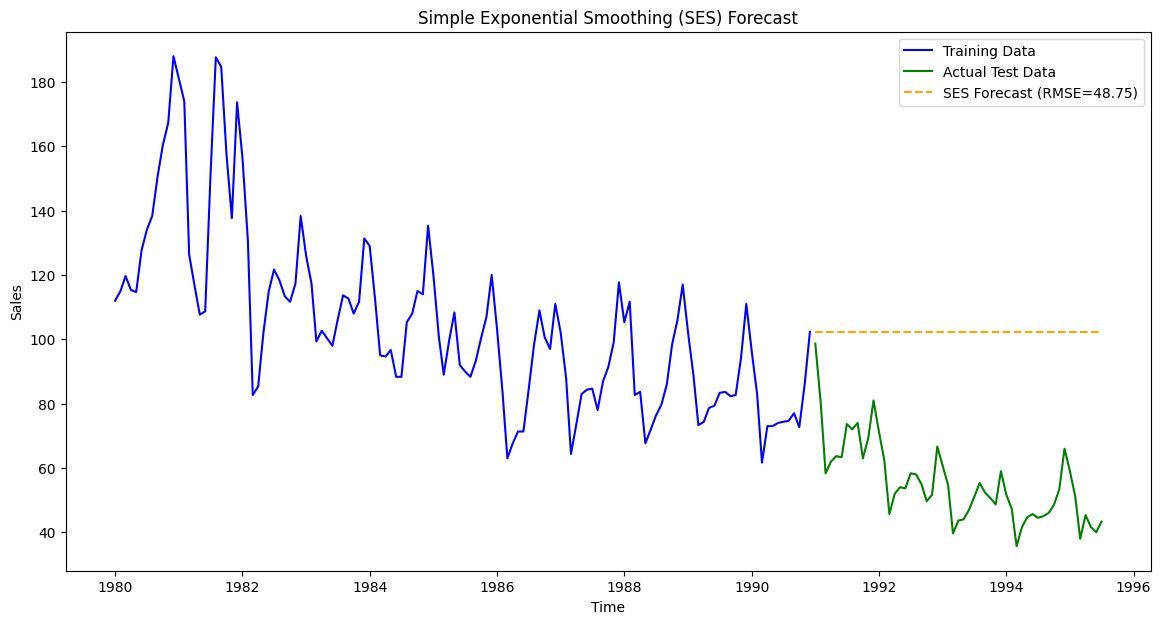

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(train_data_imputed['Rose_filled'], label='Training Data', color='blue')
plt.plot(test_data_imputed['Rose_filled'], label='Actual Test Data', color='green')
plt.plot(ses_forecast, label=f'SES Forecast (RMSE={ses_rmse:.2f})', linestyle='dashed', color='orange')
plt.title('Simple Exponential Smoothing (SES) Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt model
holt_model = ExponentialSmoothing(train_data_imputed['Rose_filled'], trend='add').fit()

# Forecast on test data
holt_forecast = holt_model.forecast(len(test_data_imputed))

# Calculate RMSE
holt_rmse = mean_squared_error(test_data_imputed['Rose_filled'], holt_forecast, squared=False)
print("Holt RMSE:", holt_rmse)


Holt RMSE: 46.312913323333646


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


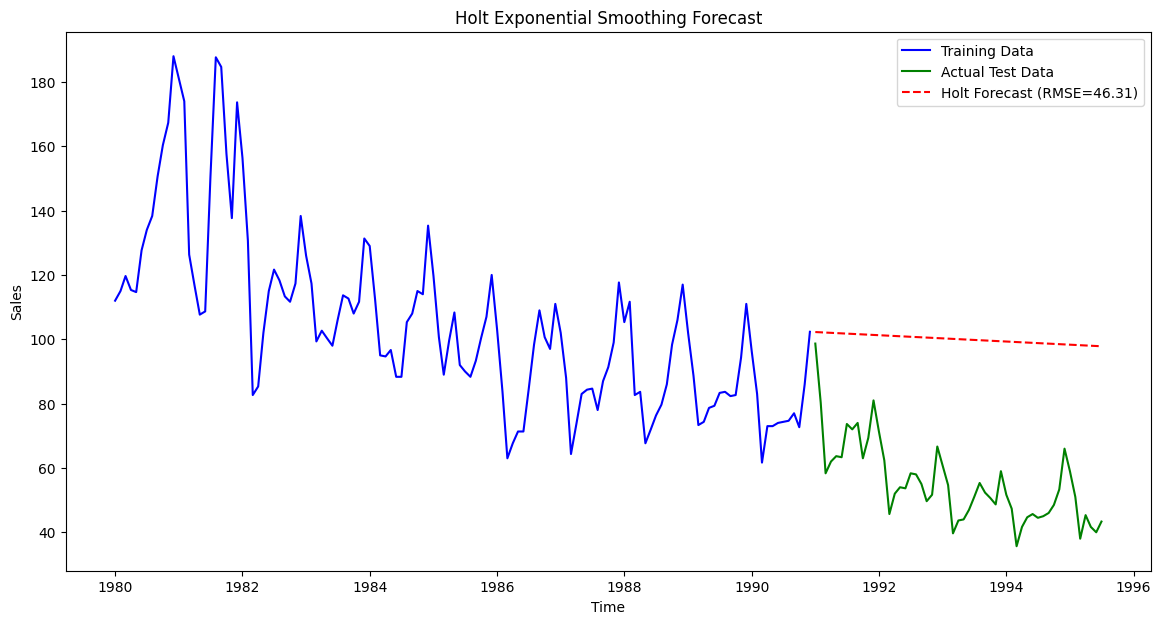

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(train_data_imputed['Rose_filled'], label='Training Data', color='blue')
plt.plot(test_data_imputed['Rose_filled'], label='Actual Test Data', color='green')
plt.plot(holt_forecast, label=f'Holt Forecast (RMSE={holt_rmse:.2f})', linestyle='dashed', color='red')
plt.title('Holt Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [21]:
# Fit Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data_imputed['Rose_filled'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast on test data
holt_winters_forecast = holt_winters_model.forecast(len(test_data_imputed))

# Calculate RMSE
holt_winters_rmse = mean_squared_error(test_data_imputed['Rose_filled'], holt_winters_forecast, squared=False)
print("Holt-Winters RMSE:", holt_winters_rmse)


Holt-Winters RMSE: 17.65432026730419


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


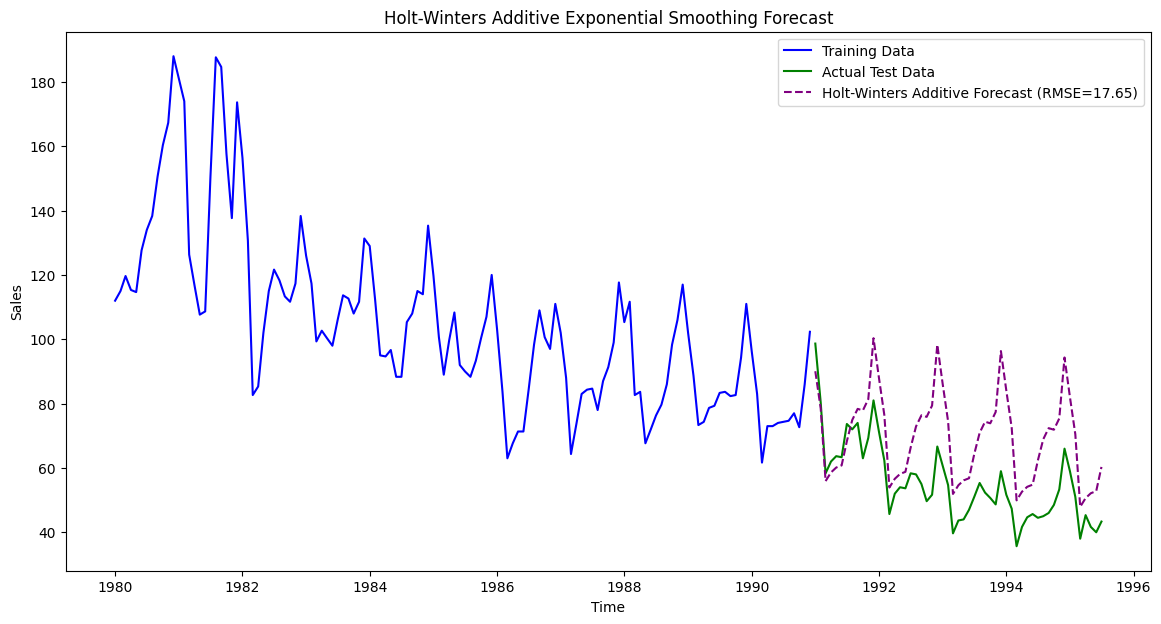

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(train_data_imputed['Rose_filled'], label='Training Data', color='blue')
plt.plot(test_data_imputed['Rose_filled'], label='Actual Test Data', color='green')
plt.plot(hw_add_forecast, label=f'Holt-Winters Additive Forecast (RMSE={hw_add_rmse:.2f})', linestyle='dashed', color='purple')
plt.title('Holt-Winters Additive Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


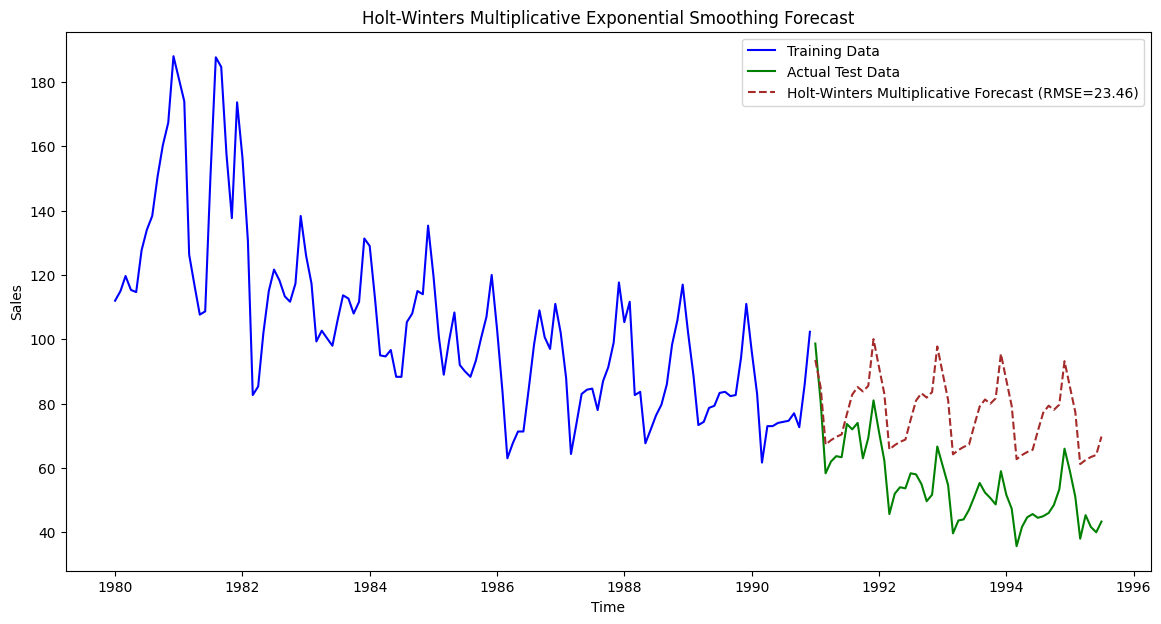

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(train_data_imputed['Rose_filled'], label='Training Data', color='blue')
plt.plot(test_data_imputed['Rose_filled'], label='Actual Test Data', color='green')
plt.plot(hw_mul_forecast, label=f'Holt-Winters Multiplicative Forecast (RMSE={hw_mul_rmse:.2f})', linestyle='dashed', color='brown')
plt.title('Holt-Winters Multiplicative Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert datetime index to numerical representation
train_data_imputed['NumericIndex'] = (train_data_imputed.index - train_data_imputed.index[0]).days

# Fit Linear Regression model
lr_model = LinearRegression().fit(train_data_imputed['NumericIndex'].values.reshape(-1, 1), train_data_imputed['Rose_filled'])

# Convert test data datetime index to numerical representation
test_data_imputed['NumericIndex'] = (test_data_imputed.index - train_data_imputed.index[0]).days

# Forecast on test data
lr_forecast = lr_model.predict(test_data_imputed['NumericIndex'].values.reshape(-1, 1))

# Calculate RMSE
lr_rmse = mean_squared_error(test_data_imputed['Rose_filled'], lr_forecast, squared=False)
print("Linear Regression RMSE:", lr_rmse)



Linear Regression RMSE: 9.113146954460204


/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_45099/4034413445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_imputed['NumericIndex'] = (train_data_imputed.index - train_data_imputed.index[0]).days
/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_45099/4034413445.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_imputed['NumericIndex'] = (test_data_imputed.index - train_data_imputed.index[0]).days


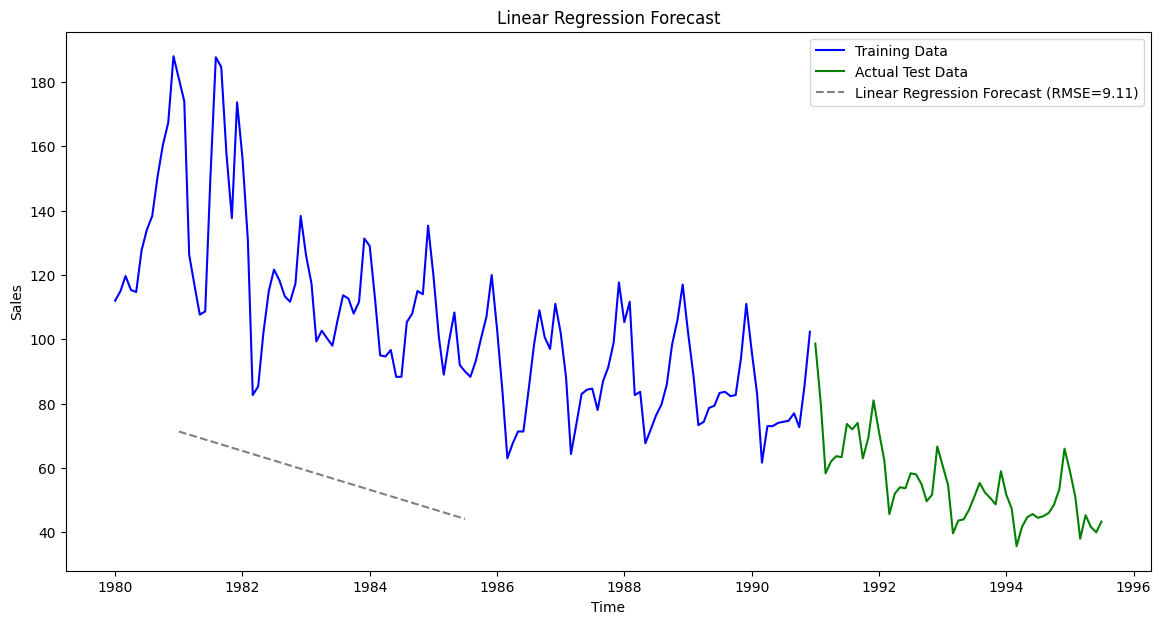

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(train_data_imputed['Rose_filled'], label='Training Data', color='blue')
plt.plot(test_data_imputed['Rose_filled'], label='Actual Test Data', color='green')
plt.plot(test_data_imputed['NumericIndex'], lr_forecast, label=f'Linear Regression Forecast (RMSE={lr_rmse:.2f})', linestyle='dashed', color='gray')
plt.title('Linear Regression Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [23]:
# Forecast using naive method (last observed value)
naive_forecast = train_data_imputed['Rose_filled'].iloc[-1]

# Repeat the naive forecast for the length of the test data
naive_forecast = pd.Series([naive_forecast] * len(test_data_imputed), index=test_data_imputed.index)

# Calculate RMSE
naive_rmse = mean_squared_error(test_data_imputed['Rose_filled'], naive_forecast, squared=False)
print("Naive Forecast RMSE:", naive_rmse)


Naive Forecast RMSE: 48.75091296736416


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

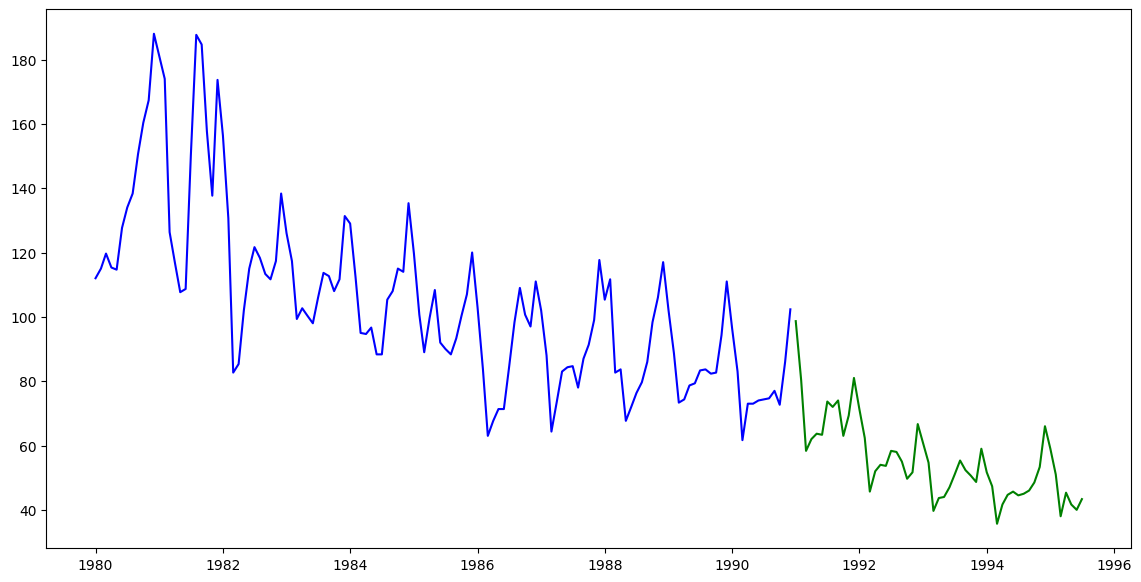

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(train_data_imputed['Rose_filled'], label='Training Data', color='blue')
plt.plot(test_data_imputed['Rose_filled'], label='Actual Test Data', color='green')
plt.axhline(naive_forecast, label=f'Naïve Forecast (RMSE={naive_rmse:.2f})', linestyle='dashed', color='cyan')
plt.title('Naive Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [24]:
# Forecast using simple average (mean of training data)
simple_avg_forecast = pd.Series([train_data_imputed['Rose_filled'].mean()] * len(test_data_imputed), index=test_data_imputed.index)

# Calculate RMSE
simple_avg_rmse = mean_squared_error(test_data_imputed['Rose_filled'], simple_avg_forecast, squared=False)
print("Simple Average Forecast RMSE:", simple_avg_rmse)


Simple Average Forecast RMSE: 51.19207341994019


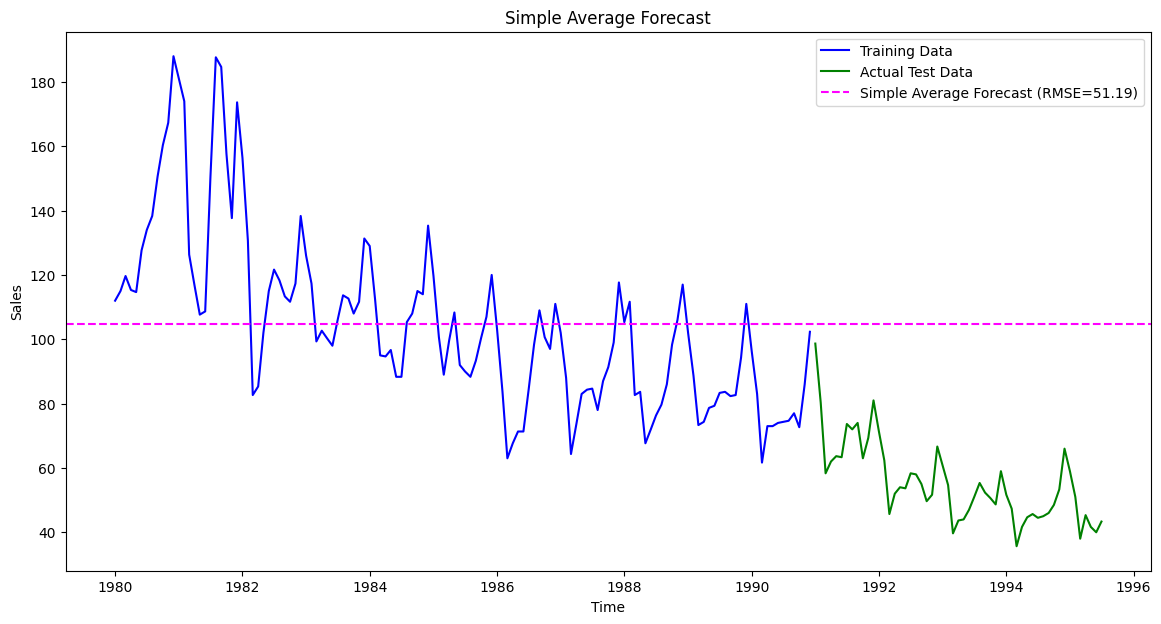

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(train_data_imputed['Rose_filled'], label='Training Data', color='blue')
plt.plot(test_data_imputed['Rose_filled'], label='Actual Test Data', color='green')
plt.axhline(average_forecast, label=f'Simple Average Forecast (RMSE={average_rmse:.2f})', linestyle='dashed', color='magenta')
plt.title('Simple Average Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [41]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test Results for {name}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is the time series stationary?', 'No (reject null hypothesis)' if result[1] < 0.05 else 'Yes (fail to reject null hypothesis)')
    print()
    
    # Perform ADF test on original Rose data
adf_test(rose_data['Rose_filled'], name='Original Rose Data')

# If the data is non-stationary, take appropriate steps to make it stationary
# Example: Differencing
diff_rose_data = rose_data['Rose_filled'].diff().dropna()

# Perform ADF test on differenced Rose data
adf_test(diff_rose_data, name='Differenced Rose Data')



ADF Test Results for Original Rose Data:
ADF Statistic: -1.741196579307732
p-value: 0.41002142067949965
Critical Values: {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}
Is the time series stationary? Yes (fail to reject null hypothesis)

ADF Test Results for Differenced Rose Data:
ADF Statistic: -3.6220614944941367
p-value: 0.005352999161873794
Critical Values: {'1%': -3.469413468959902, '5%': -2.8786964197028295, '10%': -2.5759166089965397}
Is the time series stationary? No (reject null hypothesis)



In [ ]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate ARIMA model on test data and plot the forecast
def evaluate_arima_model(train_data, test_data, order, model_name):
    # Fit ARIMA model
    model = auto_arima(train_data, start_p=1, start_q=1, max_p=5, max_q=5, m=12, seasonal=True, d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    print(f"Selected ARIMA Order for {model_name}:", model.order)

    # Forecast on test data
    arima_forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)
    
    # Calculate RMSE
    arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
    print(f"ARIMA RMSE for {model_name}:", arima_rmse)

    # Plotting ARIMA results
    plt.figure(figsize=(14, 7))
    plt.plot(train_data, label='Training Data', color='blue')
    plt.plot(test_data, label='Actual Test Data', color='green')
    plt.plot(arima_forecast, label=f'{model_name} Forecast', linestyle='dashed', color='orange')
    plt.title(f'{model_name} Forecasting Results')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

# Use the function for Sparkling dataset
evaluate_arima_model(train_sparkling['Sparkling'], test_sparkling['Sparkling'], order=None, model_name='Sparkling')


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=996.611, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1064.465, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1020.622, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1032.361, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1062.469, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1034.312, Time=0.24 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1019.846, Time=0.12 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=998.602, Time=0.64 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=998.601, Time=1.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1060.110, Time=0.04 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=1022.580, Time=0.72 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=1009.060, Time=0.31 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=994.612, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12] int

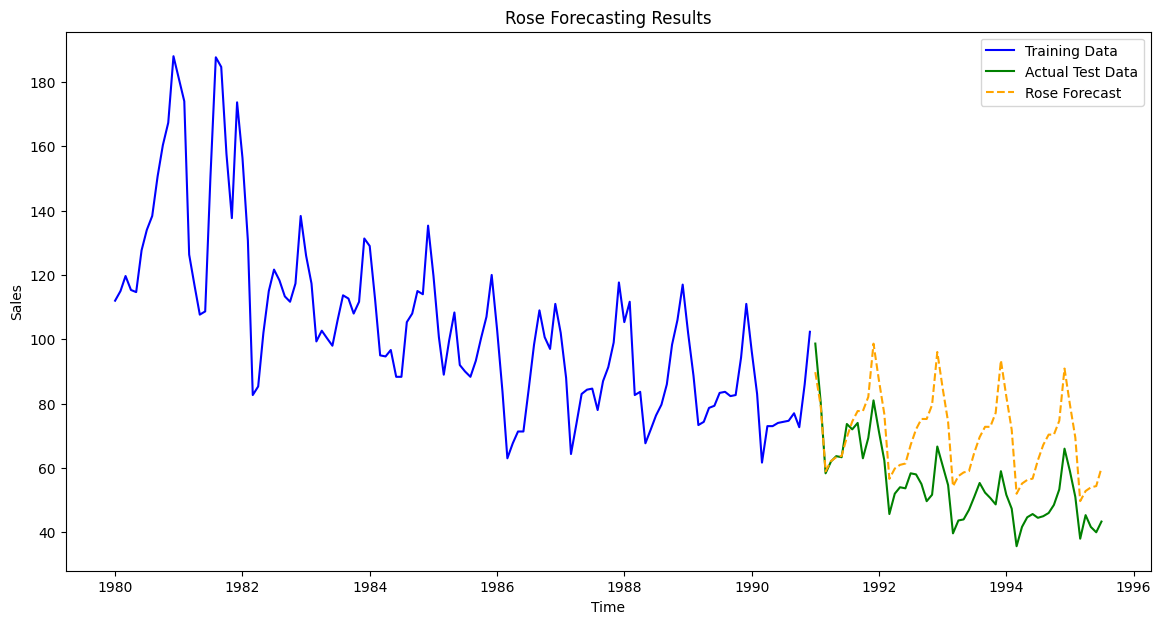

In [44]:
# Function to evaluate ARIMA model on test data and plot the forecast for Rose dataset
def evaluate_arima_model_rose(train_data, test_data, order, model_name):
    # Fit ARIMA model
    model = auto_arima(train_data, start_p=1, start_q=1, max_p=5, max_q=5, m=12, seasonal=True, d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    print(f"Selected ARIMA Order for {model_name}:", model.order)

    # Forecast on test data
    arima_forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)
    
    # Calculate RMSE
    arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
    print(f"ARIMA RMSE for {model_name}:", arima_rmse)

    # Plotting ARIMA results
    plt.figure(figsize=(14, 7))
    plt.plot(train_data, label='Training Data', color='blue')
    plt.plot(test_data, label='Actual Test Data', color='green')
    plt.plot(arima_forecast, label=f'{model_name} Forecast', linestyle='dashed', color='orange')
    plt.title(f'{model_name} Forecasting Results')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

# Use the function for Rose dataset with imputed data
evaluate_arima_model_rose(train_data_imputed['Rose_filled'], test_data_imputed['Rose_filled'], order=None, model_name='Rose')


In [50]:
import pandas as pd

# Initialize an empty list to collect results for Rose
rose_results = []

# Function to add model results to the list for Rose
def add_rose_result(model_name, parameters, rmse):
    rose_results.append({'Model': model_name, 'Parameters': parameters, 'RMSE': rmse})

# Example - Add results for each model for Rose dataset
add_rose_result('SES', 'Exponential Smoothing (Simple)', ses_rmse)
add_rose_result('Holt', 'Exponential Smoothing (Double)', holt_rmse)
add_rose_result('Holt-Winters', 'Additive Seasonal, Trend, Error', holt_winters_rmse)
add_rose_result('Linear Regression', 'Linear Regression Forecast', lr_rmse)
add_rose_result('Naive', 'Naive Forecast', naive_rmse)
add_rose_result('Simple Average', 'Simple Average Forecast', simple_avg_rmse)
# Add results for ARIMA model for Rose dataset
arima_result = {'Model': 'ARIMA', 'Parameters': 'ARIMA Forecast', 'RMSE': 17.244224541113425}
rose_results.append(arima_result)



# Convert the list to a DataFrame for Rose
rose_results_df = pd.DataFrame(rose_results)

# Display the DataFrame for Rose
print("Model Results for Rose Dataset:")
rose_results_df


Model Results for Rose Dataset:


,Model,Parameters,RMSE
0,SES,Exponential Smoothing (Simple),48.750913
1,Holt,Exponential Smoothing (Double),46.312913
2,Holt-Winters,"Additive Seasonal, Trend, Error",17.654320
3,Linear Regression,Linear Regression Forecast,9.113147
4,Naive,Naive Forecast,48.750913
5,Simple Average,Simple Average Forecast,51.192073
6,ARIMA,ARIMA Forecast,17.244225


/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_45099/1661905014.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rose_data_imputed['Rose_filled'] = rose_data_imputed['Rose'].fillna(method='ffill')
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9

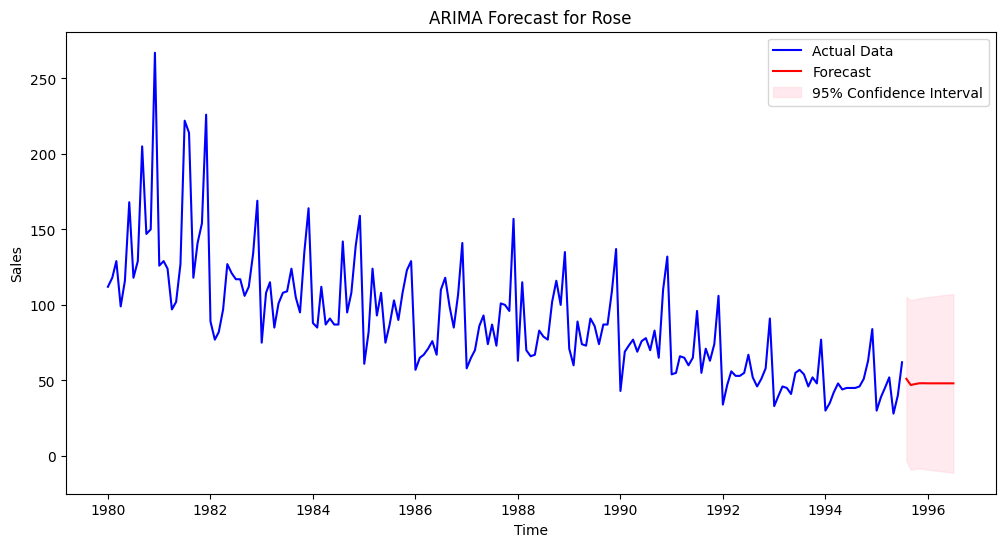

In [53]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# Read Rose.csv dataset
rose_data_imputed = pd.read_csv('Rose.csv')
rose_data_imputed['YearMonth'] = pd.to_datetime(rose_data_imputed['YearMonth'], format='%Y-%m')
rose_data_imputed = rose_data_imputed.set_index('YearMonth')

# Impute missing values (if not done already)
# For example, using forward fill
rose_data_imputed['Rose_filled'] = rose_data_imputed['Rose'].fillna(method='ffill')

# Fit the ARIMA model on the complete data
optimal_order = (2, 1, 1)  # Replace with your optimal order
optimal_arima_model = ARIMA(rose_data_imputed['Rose_filled'], order=optimal_order).fit()

# Forecast 12 months into the future
forecast_steps = 12
forecast = optimal_arima_model.get_forecast(steps=forecast_steps, alpha=0.05)

# Extracting forecast values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(rose_data_imputed.index, rose_data_imputed['Rose_filled'], label='Actual Data', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('ARIMA Forecast for Rose')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()
